In [30]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import signal


In [2]:
df_hourly = pd.read_csv("../m4_data/hourly-train.csv")
print(f"hourly shape: {df_hourly.shape}")
df_daily = pd.read_csv("../m4_data/Daily-train.csv")
print(f"daily shape: {df_daily.shape}")
df_weekly = pd.read_csv("../m4_data/Weekly-train.csv")
print(f"weekly shape: {df_weekly.shape}")
df_monthly = pd.read_csv("../m4_data/Monthly-train.csv")
print(f"monthly shape: {df_monthly.shape}")
df_quarterly = pd.read_csv("../m4_data/Quarterly-train.csv")
print(f"quarterly shape: {df_quarterly.shape}")
df_yearly = pd.read_csv("../m4_data/Yearly-train.csv")
print(f"yearly shape: {df_yearly.shape}")

l_df = [df_hourly, df_daily, df_weekly, df_monthly, df_quarterly, df_yearly]

df_all = pd.concat(l_df)
df_all.head()

daily shape: (4227, 9920)
monthly shape: (48000, 2795)
quarterly shape: (24000, 867)
weekly shape: (359, 2598)
yearly shape: (23000, 836)


V1      V2      V3      V4      V5      V6      V7      V8      V9     V10  \
0  H1   605.0   586.0   586.0   559.0   511.0   443.0   422.0   395.0   382.0   
1  H2  3124.0  2990.0  2862.0  2809.0  2544.0  2201.0  1996.0  1861.0  1735.0   
2  H3  1828.0  1806.0  1897.0  1750.0  1679.0  1620.0  1463.0  1342.0  1192.0   
3  H4  6454.0  6324.0  6075.0  5949.0  5858.0  5579.0  5163.0  4790.0  4478.0   
4  H5  4263.0  4297.0  4236.0  4080.0  3883.0  3672.0  3248.0  2841.0  2513.0   

   ...  V9911  V9912  V9913  V9914  V9915  V9916  V9917  V9918  V9919  V9920  
0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
1  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
3  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
4  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[5 rows x 9920 columns]

In [58]:
sample = df_all.sample(1).squeeze()

In [59]:
sample[:10]

V1      M4516
V2     1162.2
V3     1423.6
V4     1086.0
V5     1612.5
V6     1497.7
V7     1424.2
V8     1371.4
V9     1006.8
V10    1093.7
Name: 4515, dtype: object

In [27]:
def hamming_window(l: int)->np.ndarray:
    """generate a hamming window"""
    hamming_ar = np.empty(l)
    ham_f = lambda x: .54 - .46 * math.cos((2*math.pi*x)/(l-1))
    for i in range(l):
        hamming_ar[i] = ham_f(i)
    return hamming_ar
        

In [29]:
hamming_window(5) * np.array([1,2,3,4,5])

array([0.08, 1.08, 3.  , 2.16, 0.4 ])

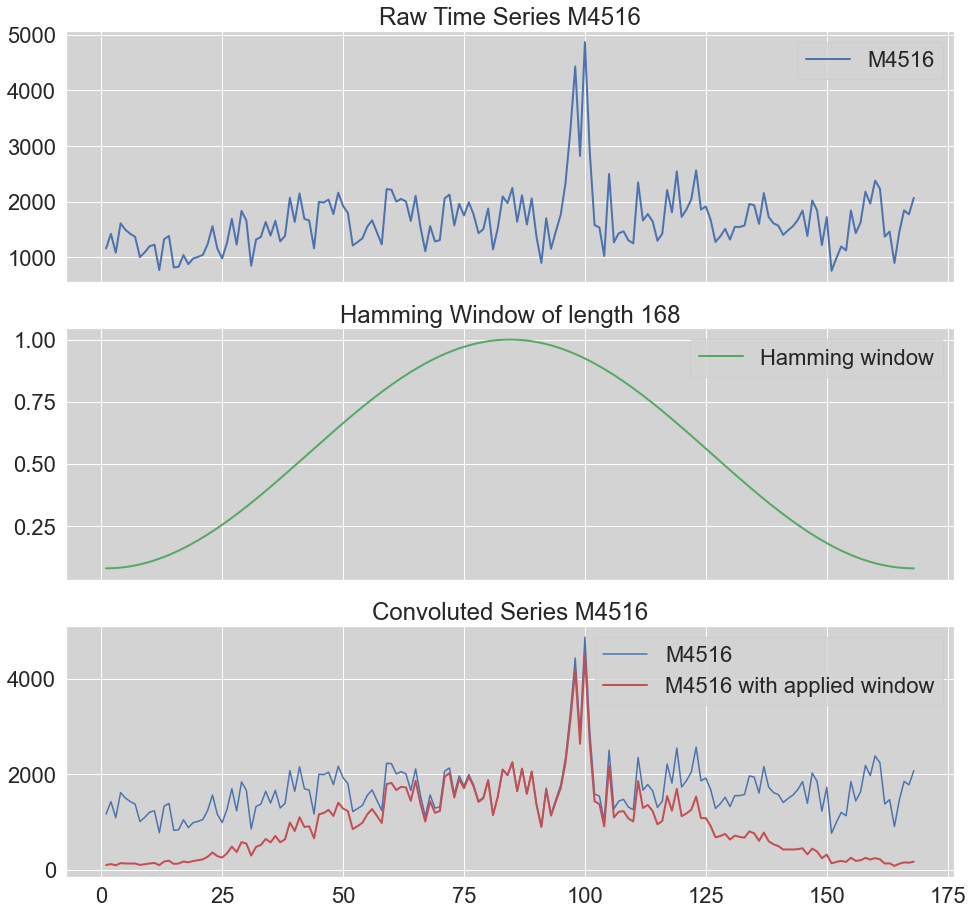

In [88]:
sns.set(font_scale=2, rc={'axes.facecolor':'lightgrey'})


ts_name = sample['V1']

ts_ar = np.array(sample.iloc[1:].dropna())
n = ts_ar.shape[0]
window_ar = hamming_window(n)
ts_hamming = ts_ar * window_ar
x = np.linspace(1,n,n)
fig, axs = plt.subplots(3,1, figsize=(14,13), sharex=True)
plt.tight_layout()
#fig.suptitle("Hamming window for {}".format(ts_name))
sns.lineplot(x=x, y=ts_ar, label=ts_name, lw=2, ax=axs.flatten()[0]);
sns.lineplot(x=x, y=window_ar, lw=2, label="Hamming window", color='g', ax=axs.flatten()[1]);
sns.lineplot(x=x, y=ts_ar, label=ts_name, ax=axs.flatten()[2]);
sns.lineplot(x=x, y=ts_hamming, lw=2,
             label="{} with applied window".format(ts_name),
             color='r',
             ax=axs.flatten()[2]);
axs.flatten()[0].set_title("Raw Time Series {}".format(ts_name))
axs.flatten()[1].set_title("Hamming Window of length {}".format(n))
axs.flatten()[2].set_title("Convoluted Series {}".format(ts_name))
plt.savefig("../img/ham_window_example.png")

In [33]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [41]:

np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])